In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
##导入模块
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
##设置画图参数
plt.rcParams['font.family'] = 'Microsoft YaHei'#正常显示中文标签
plt.rcParams['axes.unicode_minus']=False#正常显示负号
plt.style.use('fivethirtyeight')#画图主题风格，常用风格有ggplot,dark_background,bmh

## 列名解释

In [2]:
#PassengerId	旅客ID 	这条数据应该没啥用
#Survived	是否活下来了，1:yes  0:no	这个应该是对我们很有用的一个数据
#Pclass	 旅客等级 1 2 3 分别代表不同的等级	 
#Name	名字 	 
#Sex	 性别	 
#Age	 年龄	 
#SibSp	有多少兄弟姐妹/配偶同船 Number of Siblings/Spouses Aboard
#Parch	有多少父母/子女同船 Number of Parents/Children Aboard
#Ticket	船票号码
#Fare	 船票收费	 
#Cabin	 所在船舱	 
#Embarked	登船城市
#Port of Embarkation C Q S 分别代表不同的城市

In [3]:
#导入数据
df=pd.read_csv('train.csv',encoding='utf-8')

In [4]:
df.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


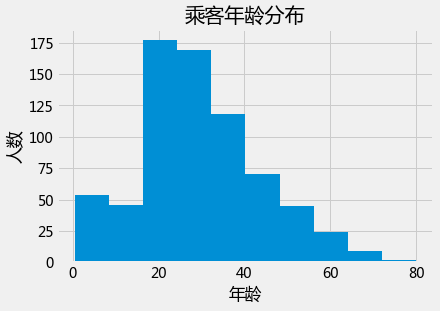

In [7]:
#查看年龄分布情况
df.Age.hist()
plt.xlabel('年龄')
plt.ylabel('人数')
plt.title('乘客年龄分布')


In [8]:
#获救情况
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

Populating the interactive namespace from numpy and matplotlib


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


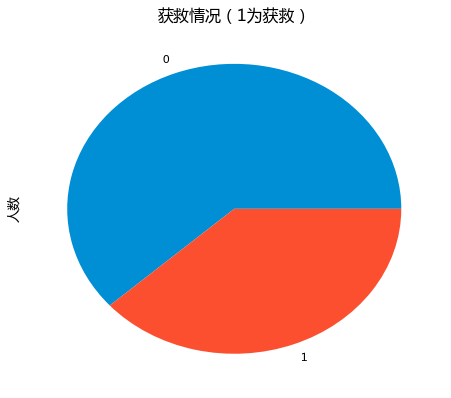

In [9]:
#获救情况可视化
%pylab inline
figure(figsize=(6,6),dpi=80)
df.Survived.value_counts().plot(kind='pie')
plt.title('获救情况（1为获救）')
plt.ylabel('人数')

In [10]:
#age缺失
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [11]:
#age缺失值用均值填充
df['age']=df['Age'].fillna(df['Age'].median())

In [12]:
#性别数值化
df['sex']=np.where(df['Sex']=='female',1,0)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
age            891 non-null float64
sex            891 non-null int64
dtypes: float64(3), int64(6), object(5)
memory usage: 97.5+ KB


In [14]:
#不同登船城市，获救情况
df.groupby(('Embarked','Survived'))['PassengerId'].count()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: PassengerId, dtype: int64

In [15]:
#登船城市编码
embarked_ranks=pd.get_dummies(df['Embarked'], prefix='embarked')

#合并df与embarked_ranks
df=df.join(embarked_ranks)

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age,sex,embarked_C,embarked_Q,embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,0,0,0,1


In [17]:
#选取建模变量
x=df[['Pclass','SibSp','Parch','Fare','age','sex','embarked_C','embarked_Q','embarked_S']].as_matrix()
y=df.Survived

## 建立逻辑回归

In [73]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

lr=LR()
x_train,x_test,y_train,y_test=train_test_split(x , y, test_size=0.3, random_state = 0)
#查看测试样本的数量及类别分布
y_train.value_counts()
lr.fit(x_train,y_train)
#训练模型
lr_y_predict = lr.predict(x_test)

#从sklearn.metrics导入classification_report
from sklearn.metrics import classification_report
#使用逻辑斯蒂回归模型自带的评分函数score获得模型在测试集上的准确性结果
print('Accuracy of LR Classifier:',lr.score(x_test,y_test))
#使用classification_report模块获得逻辑回归模型其他三个指标的结果（召回率，精确率，调和平均数）
print(classification_report(y_test,lr_y_predict,target_names=['Benign','Malignant']))

Accuracy of LR Classifier: 0.798507462687
             precision    recall  f1-score   support

     Benign       0.84      0.85      0.84       168
  Malignant       0.73      0.72      0.73       100

avg / total       0.80      0.80      0.80       268



In [70]:
#逻辑回归预测
#导入预测文件,数据处理，特征抽取
predf=pd.read_csv('test.csv',encoding='utf-8')
print('============导入数据情况=========\n',predf.info())
print('============导入数据前五行=========\n',predf.head())
#登船城市编码
embarked_ranks=pd.get_dummies(predf['Embarked'], prefix='embarked')
#合并df与embarked_ranks
predf=predf.join(embarked_ranks)
#age缺失值用均值填充
predf['age']=predf['Age'].fillna(predf['Age'].median())
#sex编码
predf['sex']=np.where(predf['Sex']=="female",1,0)
predf['Fare']=predf['Fare'].fillna(predf['Fare'].mean())

In [74]:
#逻辑回归预测
prex=predf[['Pclass','SibSp','Parch','Fare','age','sex','embarked_C','embarked_Q','embarked_S']].as_matrix()
predf['Survived']=lr.predict(prex)

In [78]:
result=predf[['PassengerId','Survived']]
result.to_csv('gender_submission_result_noindex.csv',index=False)

In [75]:
predf.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_C,embarked_Q,embarked_S,age,sex,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,34.5,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,47.0,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,62.0,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,27.0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,22.0,1,1


In [61]:
help(classification_report)

Help on function classification_report in module sklearn.metrics.classification:

classification_report(y_true, y_pred, labels=None, target_names=None, sample_weight=None, digits=2)
    Build a text report showing the main classification metrics
    
    Read more in the :ref:`User Guide <classification_report>`.
    
    Parameters
    ----------
    y_true : 1d array-like, or label indicator array / sparse matrix
        Ground truth (correct) target values.
    
    y_pred : 1d array-like, or label indicator array / sparse matrix
        Estimated targets as returned by a classifier.
    
    labels : array, shape = [n_labels]
        Optional list of label indices to include in the report.
    
    target_names : list of strings
        Optional display names matching the labels (same order).
    
    sample_weight : array-like of shape = [n_samples], optional
        Sample weights.
    
    digits : int
        Number of digits for formatting output floating point values
    
   

## 集成算法

### 随机森林

In [26]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x , y, test_size=0.3, random_state = 0)
clf = clf.fit(x_train, y_train)
rf_y_predict = clf.predict(x_test)

#从sklearn.metrics导入classification_report
from sklearn.metrics import classification_report
#使用逻辑斯蒂回归模型自带的评分函数score获得模型在测试集上的准确性结果
print('Accuracy of RandomForest Classifier:',clf.score(x_test,y_test))
#使用classification_report模块获得逻辑回归模型其他三个指标的结果（召回率，精确率，调和平均数）
print(classification_report(y_test,rf_y_predict,target_names=['unsurvied','survied']))

Accuracy of RandomForest Classifier: 0.828358208955
             precision    recall  f1-score   support

  unsurvied       0.85      0.89      0.87       168
    survied       0.79      0.73      0.76       100

avg / total       0.83      0.83      0.83       268



In [20]:
#随机森林预测
#导入预测文件,数据处理，特征抽取
predf=pd.read_csv('test.csv',encoding='utf-8')
print('============导入数据情况=========\n',predf.info())
print('============导入数据前五行=========\n',predf.head())
#登船城市编码
embarked_ranks=pd.get_dummies(predf['Embarked'], prefix='embarked')
#合并df与embarked_ranks
predf=predf.join(embarked_ranks)
#age缺失值用均值填充
predf['age']=predf['Age'].fillna(predf['Age'].median())
#sex编码
predf['sex']=np.where(predf['Sex']=="female",1,0)
predf['Fare']=predf['Fare'].fillna(predf['Fare'].mean())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
============导入数据情况=========
 None
============导入数据前五行=========
    PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albe

In [27]:
predf.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_C,embarked_Q,embarked_S,age,sex
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,34.5,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,47.0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,62.0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,27.0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,22.0,1


In [28]:
#随机森林预测
prex=predf[['Pclass','SibSp','Parch','Fare','age','sex','embarked_C','embarked_Q','embarked_S']].as_matrix()
predf['Survived']=clf.predict(prex)
result=predf[['PassengerId','Survived']]
result.to_csv('gender_submission_result_Randomforest.csv',index=False)

### Adaboost

In [49]:
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x , y, test_size=0.3, random_state = 0)
clf = AdaBoostClassifier(n_estimators=100)
clf=clf.fit(x_train,y_train)
scores = cross_val_score(clf, x, y)
print("平均得分为:",scores.mean())
ada_y_predict = clf.predict(x_test)

#从sklearn.metrics导入classification_report
from sklearn.metrics import classification_report
#使用逻辑斯蒂回归模型自带的评分函数score获得模型在测试集上的准确性结果
print('Accuracy of RandomForest Classifier:',clf.score(x_test,y_test))
#使用classification_report模块获得逻辑回归模型其他三个指标的结果（召回率，精确率，调和平均数）
print(classification_report(y_test,ada_y_predict,target_names=['unsurvied','survied']))

平均得分为: 0.794612794613
Accuracy of RandomForest Classifier: 0.809701492537
             precision    recall  f1-score   support

  unsurvied       0.85      0.85      0.85       168
    survied       0.74      0.75      0.75       100

avg / total       0.81      0.81      0.81       268



### GBDT

In [50]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
x_train,x_test,y_train,y_test=train_test_split(x , y, test_size=0.3, random_state = 0)
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=1, random_state=0).fit(x_train, y_train)
clf.score(x_test, y_test) 

0.82089552238805974